<h1> Scraping Data From Website Covid Republic Indonesia </h1>

In [94]:
#Import Library
import pandas as pd
import numpy as np
import requests
import datetime, time
import re
import json

In [95]:
#Input link website
data_url_indonesia = "https://data.covid19.go.id/public/api/update.json?_=1644678279979"
data_url_provinsi = "https://data.covid19.go.id/public/api/prov.json?_=1644678537540"
data_url_DKJ = "https://data.covid19.go.id/public/api/prov_detail_DKI_JAKARTA.json?_=1644678537541"
headers = {"User-Agent" : "Firefox"}

#API Request
A_indonesia = requests.get(url = data_url_indonesia, headers = headers).json()
A_provinsi = requests.get(url = data_url_provinsi, headers = headers).json()
A_DKJ = requests.get(url= data_url_DKJ, headers = headers).json()


In [96]:
#Checking Column from file text
A_indonesia

{'data': {'id': 1,
  'jumlah_odp': 39465,
  'jumlah_pdp': 0,
  'total_spesimen': 79004878,
  'total_spesimen_negatif': 67970361},
 'update': {'penambahan': {'jumlah_positif': 64718,
   'jumlah_meninggal': 167,
   'jumlah_sembuh': 25386,
   'jumlah_dirawat': 39165,
   'tanggal': '2022-02-16',
   'created': '2022-02-16 18:22:11'},
  'harian': [{'key_as_string': '2020-03-02T00:00:00.000Z',
    'key': 1583107200000,
    'doc_count': 1,
    'jumlah_meninggal': {'value': 0},
    'jumlah_sembuh': {'value': 0},
    'jumlah_positif': {'value': 2},
    'jumlah_dirawat': {'value': 2},
    'jumlah_positif_kum': {'value': 2},
    'jumlah_sembuh_kum': {'value': 0},
    'jumlah_meninggal_kum': {'value': 0},
    'jumlah_dirawat_kum': {'value': 2}},
   {'key_as_string': '2020-03-03T00:00:00.000Z',
    'key': 1583193600000,
    'doc_count': 1,
    'jumlah_meninggal': {'value': 0},
    'jumlah_sembuh': {'value': 0},
    'jumlah_positif': {'value': 0},
    'jumlah_dirawat': {'value': 0},
    'jumlah_posit

In [97]:
#Show column to analysis
A_indonesia["update"]["harian"]

[{'key_as_string': '2020-03-02T00:00:00.000Z',
  'key': 1583107200000,
  'doc_count': 1,
  'jumlah_meninggal': {'value': 0},
  'jumlah_sembuh': {'value': 0},
  'jumlah_positif': {'value': 2},
  'jumlah_dirawat': {'value': 2},
  'jumlah_positif_kum': {'value': 2},
  'jumlah_sembuh_kum': {'value': 0},
  'jumlah_meninggal_kum': {'value': 0},
  'jumlah_dirawat_kum': {'value': 2}},
 {'key_as_string': '2020-03-03T00:00:00.000Z',
  'key': 1583193600000,
  'doc_count': 1,
  'jumlah_meninggal': {'value': 0},
  'jumlah_sembuh': {'value': 0},
  'jumlah_positif': {'value': 0},
  'jumlah_dirawat': {'value': 0},
  'jumlah_positif_kum': {'value': 2},
  'jumlah_sembuh_kum': {'value': 0},
  'jumlah_meninggal_kum': {'value': 0},
  'jumlah_dirawat_kum': {'value': 2}},
 {'key_as_string': '2020-03-04T00:00:00.000Z',
  'key': 1583280000000,
  'doc_count': 1,
  'jumlah_meninggal': {'value': 0},
  'jumlah_sembuh': {'value': 0},
  'jumlah_positif': {'value': 0},
  'jumlah_dirawat': {'value': 0},
  'jumlah_posi

In [98]:
#Convert data to dataframe
Data_indonesia = pd.DataFrame(data=A_indonesia["update"]["harian"])
Data_indonesia.head()

,key_as_string,key,doc_count,jumlah_meninggal,jumlah_sembuh,jumlah_positif,jumlah_dirawat,jumlah_positif_kum,jumlah_sembuh_kum,jumlah_meninggal_kum,jumlah_dirawat_kum
0,2020-03-02T00:00:00.000Z,1583107200000,1,{'value': 0},{'value': 0},{'value': 2},{'value': 2},{'value': 2},{'value': 0},{'value': 0},{'value': 2}
1,2020-03-03T00:00:00.000Z,1583193600000,1,{'value': 0},{'value': 0},{'value': 0},{'value': 0},{'value': 2},{'value': 0},{'value': 0},{'value': 2}
2,2020-03-04T00:00:00.000Z,1583280000000,1,{'value': 0},{'value': 0},{'value': 0},{'value': 0},{'value': 2},{'value': 0},{'value': 0},{'value': 2}
3,2020-03-05T00:00:00.000Z,1583366400000,1,{'value': 0},{'value': 0},{'value': 0},{'value': 0},{'value': 2},{'value': 0},{'value': 0},{'value': 2}
4,2020-03-06T00:00:00.000Z,1583452800000,1,{'value': 0},{'value': 0},{'value': 2},{'value': 2},{'value': 4},{'value': 0},{'value': 0},{'value': 4}


In [99]:
#Change type from all "values "to int 
cols = [i for i in Data_indonesia.columns if i not in ["key_as_string","key","doc_count"]]
for col in cols:
    Data_indonesia[col] = Data_indonesia[col].astype(str)
    Data_indonesia[col] = Data_indonesia[col].map(lambda x: x.lstrip("{'value': ").rstrip("}"))
    Data_indonesia[col] = Data_indonesia[col].astype(int)
Data_indonesia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   key_as_string         717 non-null    object
 1   key                   717 non-null    int64 
 2   doc_count             717 non-null    int64 
 3   jumlah_meninggal      717 non-null    int64 
 4   jumlah_sembuh         717 non-null    int64 
 5   jumlah_positif        717 non-null    int64 
 6   jumlah_dirawat        717 non-null    int64 
 7   jumlah_positif_kum    717 non-null    int64 
 8   jumlah_sembuh_kum     717 non-null    int64 
 9   jumlah_meninggal_kum  717 non-null    int64 
 10  jumlah_dirawat_kum    717 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 61.7+ KB


In [100]:
#change type of key_as_string to datetime
Data_indonesia["key_as_string"] = pd.to_datetime(Data_indonesia["key_as_string"])
Data_indonesia["key_as_string"] = Data_indonesia["key_as_string"].map(lambda x: x.strftime("%Y-%m-%d"))
#rename and drop column if that value unique
Data_indonesia = Data_indonesia.rename(columns={"key_as_string":"tanggal"})
Data_indonesia = Data_indonesia.drop(columns=["key","doc_count"])
Data_indonesia.to_csv("Data_Indonesia_Covid-19.csv")

In [101]:
Data_indonesia

,tanggal,jumlah_meninggal,jumlah_sembuh,jumlah_positif,jumlah_dirawat,jumlah_positif_kum,jumlah_sembuh_kum,jumlah_meninggal_kum,jumlah_dirawat_kum
0,2020-03-02,0,0,2,2,2,0,0,2
1,2020-03-03,0,0,0,0,2,0,0,2
2,2020-03-04,0,0,0,0,2,0,0,2
3,2020-03-05,0,0,0,0,2,0,0,2
4,2020-03-06,0,0,2,2,4,0,0,4
...,...,...,...,...,...,...,...,...,...
712,2022-02-12,107,32570,55209,22532,4763252,4282847,145065,335340
713,2022-02-13,111,26916,44526,17499,4807778,4309763,145176,352839
714,2022-02-14,145,13338,36501,23018,4844279,4323101,145321,375857
715,2022-02-15,134,26747,57049,30168,4901328,4349848,145455,406025


<h1> Analysis data used Supervased Learning - Regression TimeSeries </h1>

In [102]:
import numpy as np
import pandas as pd
from darts import TimeSeries
from darts.models import ExponentialSmoothing, AutoARIMA, Prophet, Theta
from darts.metrics import mape
from darts.dataprocessing.transformers import scaler,InvertibleMapper
from darts.dataprocessing import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
#Data Prepocessing
#Checking Data NaN
Data_indonesia.isna().sum()

tanggal                 0
jumlah_meninggal        0
jumlah_sembuh           0
jumlah_positif          0
jumlah_dirawat          0
jumlah_positif_kum      0
jumlah_sembuh_kum       0
jumlah_meninggal_kum    0
jumlah_dirawat_kum      0
dtype: int64

In [104]:
#Data Prepocessing
#Checking Data distribution
Data_indonesia.describe()

,jumlah_meninggal,jumlah_sembuh,jumlah_positif,jumlah_dirawat,jumlah_positif_kum,jumlah_sembuh_kum,jumlah_meninggal_kum,jumlah_dirawat_kum
count,717.000000,717.000000,717.000000,717.000000,7.170000e+02,7.170000e+02,717.000000,717.000000
mean,203.099024,6102.139470,6926.145049,620.906555,1.750598e+06,1.598778e+06,55170.032078,96649.761506
std,346.181238,8904.287032,10518.588034,5888.316044,1.687436e+06,1.604555e+06,55622.685419,119334.235852
min,0.000000,0.000000,0.000000,-25725.000000,2.000000e+00,0.000000e+00,0.000000,2.000000
25%,30.000000,577.000000,772.000000,-504.000000,1.658870e+05,1.209000e+05,7169.000000,16321.000000
50%,98.000000,3625.000000,3874.000000,137.000000,1.298608e+06,1.104990e+06,35014.000000,60431.000000
75%,185.000000,6830.000000,6808.000000,708.000000,3.967048e+06,3.522048e+06,125342.000000,121222.000000
max,2069.000000,48832.000000,64718.000000,39165.000000,4.966046e+06,4.375234e+06,145622.000000,574135.000000


<AxesSubplot:xlabel='jumlah_positif', ylabel='Count'>

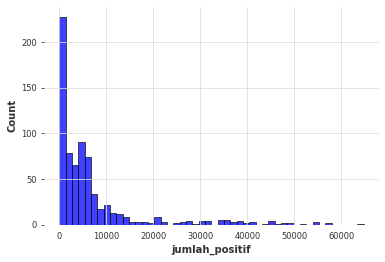

In [105]:
sns.histplot(data=Data_indonesia["jumlah_positif"], color="b")

In [106]:
#Because Data not normal (tail), as we can see for deviation value mean_Jumlah_Positif and 50%_jumlah_positif is so far.
#We must Prepocessing to maximal accuracy when data did input on model
# First, If we analysis to prediction cases covid in Indonesia per day. So we just input column "jumlah positif" and "hari ke-""
Data_Analisis = Data_indonesia[["tanggal", "jumlah_positif"]]
Data_Analisis


,tanggal,jumlah_positif
0,2020-03-02,2
1,2020-03-03,0
2,2020-03-04,0
3,2020-03-05,0
4,2020-03-06,2
...,...,...
712,2022-02-12,55209
713,2022-02-13,44526
714,2022-02-14,36501
715,2022-02-15,57049


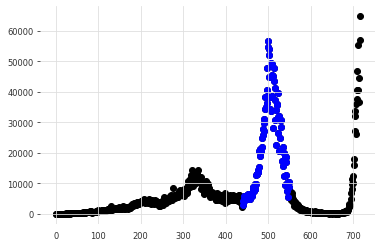

In [107]:
#Checking covid case pattern in indonesia
#So we must change type of 'tanggal' from Object -> Timeseries -> int 
Begining_date = pd.to_datetime(Data_Analisis.iloc[0]["tanggal"])
x = Data_Analisis["tanggal"].apply(lambda x: pd.Timedelta(pd.to_datetime(x)-Begining_date).days)
plt.scatter(x,Data_Analisis[["jumlah_positif"]])
plt.scatter(x[440:550],Data_Analisis.iloc[440:550,1:], c="b")
plt.show()
#from this section we import model from this curve with color blue to simulation regression Timeseries

In [108]:
#Because the blue curve we will model is still not well distributed and the probability for underfitting is large. 
#Therefore, the data transformation will be carried out to logarithmic function
#make model transformer
transformer = InvertibleMapper(fn = lambda timestamp, x: np.log1p(x),
                              inverse_fn = lambda timestamp, x: np.expm1(x),)


In [109]:
#Input data model and transform that value
data_ind = TimeSeries.from_dataframe(Data_indonesia.iloc[440:600,:],"tanggal", "jumlah_positif")
data_indo = transformer.transform(data_ind)
data_indo

<TimeSeries (DataArray) (tanggal: 160, component: 1, sample: 1)>
array([[[ 8.0330095 ]],

       [[ 8.36543964]],

       [[ 8.3395009 ]],

       [[ 8.49125981]],

       [[ 8.66526831]],

       [[ 8.65643326]],

       [[ 8.5748959 ]],

       [[ 8.57187075]],

       [[ 8.68406264]],

       [[ 8.52931937]],

...

       [[ 7.1180162 ]],

       [[ 6.96034773]],

       [[ 6.82001636]],

       [[ 6.90575328]],

       [[ 6.61740298]],

       [[ 6.44094654]],

       [[ 6.80682936]],

       [[ 6.81892407]],

       [[ 6.45204895]],

       [[ 6.63463336]]])
Coordinates:
  * tanggal    (tanggal) datetime64[ns] 2021-05-16 2021-05-17 ... 2021-10-22
  * component  (component) object 'jumlah_positif'
Dimensions without coordinates: sample

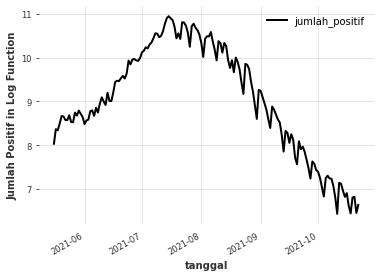

In [110]:
#Checking that raw curve to confirm that value make sure if the plotting is smooth
data_indo.plot()
plt.ylabel("Jumlah Positif in Log Function")
plt.show()

In [111]:
#Next step split data to data train and data validation (20% from raw data)
train, val = data_indo[:-26], data_indo[-26:]
#Checking the best model regression from this data
def all_model(model):
    model.fit(train)
    predik = model.predict(len(val))
    print(f"Score model {model} mape {mape(val, predik)}")
all_model(ExponentialSmoothing())
all_model(AutoARIMA())
all_model(Theta())
all_model(Prophet())

Score model ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=ModelMode.ADDITIVE, seasonal_periods=7 mape 1.4765364610545055


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Score model Auto-ARIMA mape 2.7427540407576387
Score model Theta(2) mape 7.220511925443697
Score model Prophet mape 3.686534791880879


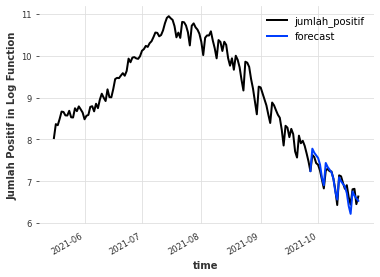

In [112]:
#so the best model we can used is AutoArima
#Save that fitting model to predict "jumlah positif" on future days
model_AA =ExponentialSmoothing()
model_AA.fit(train)
predik = model_AA.predict(len(val))
#Plot graph model regression in Log function
data_indo.plot()
predik.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.ylabel("Jumlah Positif in Log Function")
plt.show()

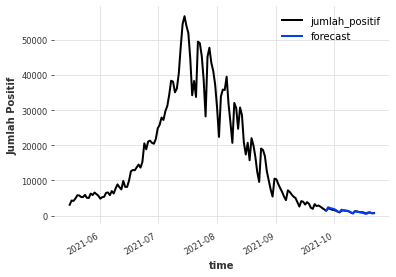

In [113]:
#Plot graph model regression in Real Value
predik_R = transformer.inverse_transform(predik)
data_ind.plot()
predik_R.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.ylabel("Jumlah Positif")
plt.show()

In [114]:
#From that model, we can predict case covid in next 20 day
#Import Time from Dataframe Data_indonesia and replace value in column "jumlah_positif" to NaN value 
Data_next_20 = Data_indonesia.loc[601:620,['tanggal',"jumlah_positif"]]
Data_next_20["jumlah_positif"] = Data_next_20["jumlah_positif"].map(lambda x : np.nan)
#Convert Object to Timeseries
Data_next_20 = TimeSeries.from_dataframe(Data_next_20,"tanggal", "jumlah_positif")
Data_next_20

<TimeSeries (DataArray) (tanggal: 20, component: 1, sample: 1)>
array([[[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]],

       [[nan]]])
Coordinates:
  * tanggal    (tanggal) datetime64[ns] 2021-10-24 2021-10-25 ... 2021-11-12
  * component  (component) object 'jumlah_positif'
Dimensions without coordinates: sample

In [115]:
#Predict that for next 20 day and convert that to real value
Predik_next_20 = model_AA.predict(len(Data_next_20))
Predik_next_20_real = transformer.inverse_transform(Predik_next_20)
Predik_next_20_real

<TimeSeries (DataArray) (time: 20, component: 1, sample: 1)>
array([[[1401.01924006]],

       [[2388.5933685 ]],

       [[2169.20832963]],

       [[2036.30676565]],

       [[1912.94198517]],

       [[1636.14896932]],

       [[1202.10758183]],

       [[ 994.89137949]],

       [[1696.39142531]],

       [[1540.55642479]],

       [[1446.15292582]],

       [[1358.52365661]],

       [[1161.91025038]],

       [[ 853.5991632 ]],

       [[ 706.4080094 ]],

       [[1204.70206156]],

       [[1094.00833554]],

       [[1026.95103124]],

       [[ 964.70564166]],

       [[ 825.0459346 ]]])
Coordinates:
  * time       (time) datetime64[ns] 2021-09-27 2021-09-28 ... 2021-10-16
  * component  (component) object 'jumlah_positif'
Dimensions without coordinates: sample

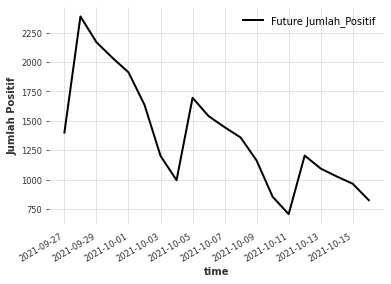

In [116]:
#Plotting Data Graph for "Jumlah Positif" Covid-19 in next 20 days from model
Predik_next_20_real.plot(label="Future Jumlah_Positif")
plt.legend()
plt.ylabel("Jumlah Positif")
plt.show()